<a href="https://colab.research.google.com/github/gowravmannem/HackAi_2024/blob/main/Bruteforce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [4]:
dummies = pd.get_dummies(df.furnishingstatus)

# Concatenate the dummies to original dataframe
merged = pd.concat([df, dummies], axis='columns')

# drop the values
df_new = merged.drop(columns=['furnishingstatus'])

# print the dataframe
df_new

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [5]:
# taking out Area data outliers
df1 = df_new.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = ["area"]

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
529,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
530,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
531,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [6]:
X = df1.drop(['price'],axis=1)
y = df1['price']


In [7]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

checkVIF(X)

,Features,VIF
12,semi-furnished,13.09
13,unfurnished,9.31
11,furnished,8.76
3,stories,1.49
0,area,1.41
1,bedrooms,1.37
6,basement,1.33
2,bathrooms,1.30
8,airconditioning,1.24
5,guestroom,1.23


In [8]:
#solving multicollinearity issue
X=X.drop(["furnished","semi-furnished","unfurnished"],axis=1)

In [9]:

X_train,X_test,Train_Y,Test_Y = train_test_split(X,y,train_size=0.85, test_size=0.15, random_state=100)

In [10]:
import pandas as pd
#scaler = MinMaxScaler()
#standard scaler works better
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
Train_X_std = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.fit_transform(X_test)
Test_X_std = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS','Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,1,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')
    plt.xlabel('Errors')

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()

In [30]:
RFR = RandomForestRegressor(n_estimators=1000, min_samples_split=5,min_samples_leaf=2, max_features=10,bootstrap=True).fit(Train_X_std,Train_Y)
pred1 = RFR.predict(Train_X_std)
pred2 = RFR.predict(Test_X_std)


In [31]:
df = pd.read_csv('TestData.csv')
df

,id,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1,3150,3,1,2,no,no,no,no,no,0,no,unfurnished
1,2,4040,2,1,2,yes,no,no,no,no,1,no,semi-furnished
2,3,4500,4,2,2,yes,no,yes,no,no,2,no,furnished
3,4,5400,4,1,2,yes,no,no,no,no,0,no,unfurnished
4,5,6000,4,2,4,yes,no,no,no,no,2,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,214,6000,4,2,4,yes,yes,no,no,yes,1,no,furnished
214,215,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished
215,216,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
216,217,6050,3,1,1,yes,no,yes,no,no,0,yes,semi-furnished


In [32]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])

df

,id,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1,3150,3,1,2,0,0,0,0,0,0,0,unfurnished
1,2,4040,2,1,2,1,0,0,0,0,1,0,semi-furnished
2,3,4500,4,2,2,1,0,1,0,0,2,0,furnished
3,4,5400,4,1,2,1,0,0,0,0,0,0,unfurnished
4,5,6000,4,2,4,1,0,0,0,0,2,0,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,214,6000,4,2,4,1,1,0,0,1,1,0,furnished
214,215,8875,3,1,1,1,0,0,0,0,1,0,semi-furnished
215,216,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
216,217,6050,3,1,1,1,0,1,0,0,0,1,semi-furnished


In [33]:
dummies = pd.get_dummies(df.furnishingstatus)

# Concatenate the dummies to original dataframe
merged = pd.concat([df, dummies], axis='columns')

# drop the values
df_new = merged.drop(columns=['furnishingstatus'])

# print the dataframe
df_new

,id,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,1,3150,3,1,2,0,0,0,0,0,0,0,0,0,1
1,2,4040,2,1,2,1,0,0,0,0,1,0,0,1,0
2,3,4500,4,2,2,1,0,1,0,0,2,0,1,0,0
3,4,5400,4,1,2,1,0,0,0,0,0,0,0,0,1
4,5,6000,4,2,4,1,0,0,0,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,214,6000,4,2,4,1,1,0,0,1,1,0,1,0,0
214,215,8875,3,1,1,1,0,0,0,0,1,0,0,1,0
215,216,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
216,217,6050,3,1,1,1,0,1,0,0,0,1,0,1,0


In [34]:
X = df_new.drop(['id'],axis=1)
y = df_new['id']

In [35]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

checkVIF(X)

,Features,VIF
12,semi-furnished,12.85
13,unfurnished,9.36
11,furnished,8.13
3,stories,1.53
1,bedrooms,1.41
6,basement,1.41
5,guestroom,1.32
2,bathrooms,1.30
0,area,1.28
9,parking,1.26


In [36]:
#solving multicollinearity issue
X=X.drop(["furnished","semi-furnished","unfurnished"],axis=1)

In [37]:

#need to clean test_X

predicted_prices = RFR.predict(X)

In [38]:
my_submission = pd.DataFrame({"id": y, "price": predicted_prices})
my_submission.to_csv("my_submission.csv", index=False)

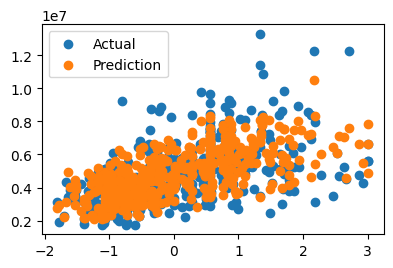



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6596050693405969
Mean Squared Error (MSE) on Training set       ---> 1161054059978.2356
Root Mean Squared Error (RMSE) on Training set ---> 1077522.1853763547

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.7099720338501881
Mean Squared Error (MSE) on Training set       ---> 1008033481732.6897
Root Mean Squared Error (RMSE) on Training set ---> 1004008.7060044298

--------------------Residual Plots--------------------


<ipython-input-11-f2972dc1902b>:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Train_Y - pred1))


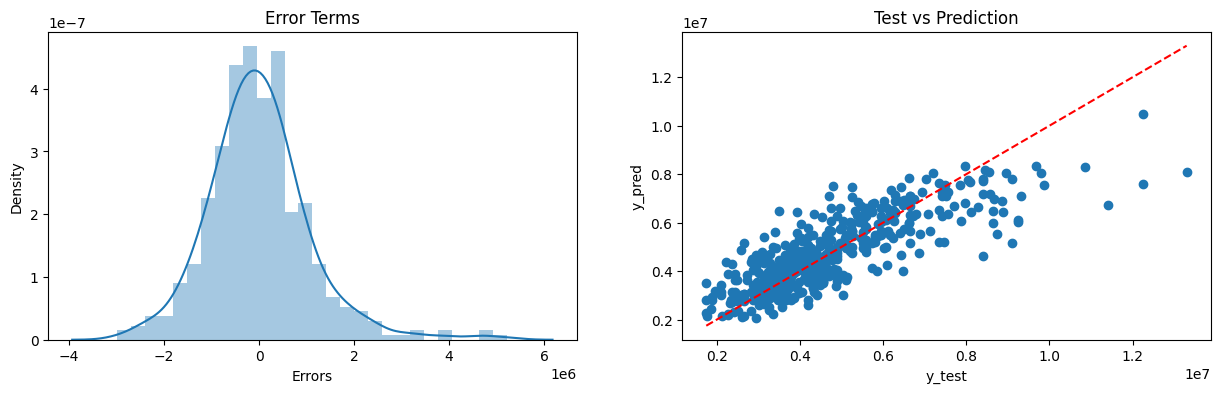

In [26]:
RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

Evaluate(1, pred1, pred2)

In [ ]:
LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

Evaluate(2, pred1, pred2)

In [ ]:
ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)


Evaluate(3, pred1, pred2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor().fit(Train_X_std,Train_Y)
pred1 = GBR.predict(Train_X_std)
pred2 = GBR.predict(Test_X_std)

Evaluate(4, pred1, pred2)

In [ ]:
XGB = xgb.XGBRegressor().fit(Train_X_std,Train_Y)
pred1 = XGB.predict(Train_X_std)
pred2 = XGB.predict(Test_X_std)

Evaluate(5, pred1, pred2)

In [ ]:
XGRF = xgb.XGBRFRegressor().fit(Train_X_std,Train_Y)
pred1 = XGRF.predict(Train_X_std)
pred2 = XGRF.predict(Test_X_std)

Evaluate(6, pred1, pred2)

In [ ]:
LGBM = LGBMRegressor().fit(Train_X_std,Train_Y)
pred1 = LGBM.predict(Train_X_std)
pred2 = LGBM.predict(Test_X_std)

Evaluate(7, pred1, pred2)

In [ ]:
CBR = CatBoostRegressor().fit(Train_X_std,Train_Y)
pred1 = CBR.predict(Train_X_std)
pred2 = CBR.predict(Test_X_std)

Evaluate(8, pred1, pred2)

In [ ]:
EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Random Forest Regressor (RFR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Gradient Boost Regressor (GBR)','XGB',"XGRF","LGBM","CBR"]
EMC